# strength of pw6 feature vs pw7 feature

this notebook compares the strength of pw6 against the strength of pw7 based on handmade measurements of PEWs.
it classifies each object as its respective Branch subtype based on these measurements.
it compares these classifications to those made by CSP

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sndata
from sndata.csp import DR1
dr1 = DR1()

# preliminary imports/reading data

In [2]:
dr1.download_module_data()

In [40]:
emdata = pd.read_csv('../SN-Spectral-Evolution/emily_file.csv')

eldata = pd.read_csv('../SN-Spectral-Evolution-master/results/ella_csp.csv')

andata = pd.read_csv('../SN-Spectral-Evolution-master/results/anish_csp.csv')

andata.head()
#reading csv file with our measurements in as a pandas dataframe

,obj_id,time,feat_name,feat_start,feat_end,vel,vel_err,vel_samperr,pew,pew_err,pew_samperr,area,area_err,area_samperr,notes
0,2004ef,2453255.66,pW1,3762.7879,4068.8654,4262.146830,0.0,1341.168849,10.200355,0.0,19.901073,4.404554e-15,0.0,8.889777e-15,NaN
1,2004ef,2453255.66,pW2,3929.0819,4068.8654,NaN,0.0,NaN,12.432846,0.0,3.538539,7.091278e-15,0.0,2.246094e-15,NaN
2,2004ef,2453255.66,pW3,4073.6855,4466.5251,13225.623532,0.0,161.814243,88.346404,0.0,6.506680,5.483887e-14,0.0,5.200474e-15,NaN
3,2004ef,2453255.66,pW4,4500.2660,5061.8098,21906.333775,0.0,241.564916,174.768556,0.0,7.198777,9.398515e-14,0.0,5.704729e-15,NaN
4,2004ef,2453255.66,pW5,5155.8021,5601.6630,9043.079766,0.0,112.683776,81.630045,0.0,2.541775,2.970750e-14,0.0,1.135316e-15,NaN


# compiling our feature 6 data and feature 7 data and indexing

In [4]:
emseven_data = emdata[emdata['feat_name'] == 'pW7']

elseven_data = eldata[eldata['feat_name'] == 'pW7']

anseven_data = andata[andata['feat_name'] == 'pW7']

emseven_data.head()
#making a dataframe of only the pW7 measurements

,obj_id,time,feat_name,feat_start,feat_end,vel,vel_err,vel_samperr,pew,pew_err,pew_samperr,area,area_err,area_samperr,notes
5,2004ef,2453255.66,pW7,5845.079000,6392.16240,15193.426217,0.0,27.138789,160.323798,0.0,5.064953,4.837755e-14,0.0,2.321021e-15,NaN
9,2004eo,2453267.52,pW7,5923.253700,6357.75240,11635.087862,0.0,19.207558,105.973148,0.0,1.431908,3.167018e-14,0.0,5.481292e-16,NaN
16,2004ey,2453303.56,pW7,5973.191700,6307.25060,10508.780942,0.0,57.857318,95.986843,0.0,4.458953,2.840620e-13,0.0,1.860332e-14,NaN
23,2004gs,2453352.76,pW7,5923.232300,6352.79110,11184.504831,0.0,28.143348,132.498726,0.0,2.565899,3.506492e-14,0.0,9.264700e-16,NaN
30,2004gu,2453358.83,pW7,5925.613654,6262.08383,11080.306970,0.0,21.596568,57.949531,0.0,1.759237,1.089877e-14,0.0,3.989128e-16,NaN


In [5]:
emsix_data = emdata[emdata['feat_name'] == 'pW6']

elsix_data = eldata[eldata['feat_name'] == 'pW6']

ansix_data = andata[andata['feat_name'] == 'pW6']

emsix_data.head()
#making a dataframe of only the pW6 measurements

,obj_id,time,feat_name,feat_start,feat_end,vel,vel_err,vel_samperr,pew,pew_err,pew_samperr,area,area_err,area_samperr,notes
4,2004ef,2453255.66,pW6,5601.6630,5845.0790,11653.806410,0.0,116.308974,26.145953,0.0,2.585566,7.766692e-15,0.0,8.608022e-16,relatively clean gaussian but it looks like al...
8,2004eo,2453267.52,pW6,5595.2773,5926.0569,9588.114897,0.0,55.984429,34.831421,0.0,1.919305,1.100466e-14,0.0,6.911855e-16,NaN
15,2004ey,2453303.56,pW6,5655.6296,5878.3355,9616.689113,0.0,68.443993,9.803429,0.0,1.028993,3.389668e-14,0.0,3.758348e-15,NaN
22,2004gs,2453352.76,pW6,5582.5477,5923.2323,10590.729334,0.0,13.771058,44.383100,0.0,0.980112,1.233936e-14,0.0,3.143354e-16,NaN
35,2005M,2453405.71,pW6,5700.1088,5902.4703,7606.921697,0.0,620.536232,5.840748,0.0,1.640812,5.560172e-15,0.0,1.608258e-15,compare to official CSP results- seems to star...


In [6]:
emsix_data2 = emsix_data.set_index(['obj_id' , 'time'])
emseven_data2 = emseven_data.set_index(['obj_id' , 'time'])

elsix_data2 = elsix_data.set_index(['obj_id' , 'time'])
elseven_data2 = elseven_data.set_index(['obj_id' , 'time'])

ansix_data2 = ansix_data.set_index(['obj_id' , 'time'])
anseven_data2 = anseven_data.set_index(['obj_id' , 'time'])

#indexing the two dataframes by object id and time so we can later join them on that parameter

# joining our data

In [7]:
emjoined_data = emsix_data2.join(emseven_data2 , lsuffix = 'six' , rsuffix = 'seven')
emjoined_data.dropna(subset = ['pewsix' , 'pewseven'])

eljoined_data = elsix_data2.join(elseven_data2 , lsuffix = 'six' , rsuffix = 'seven')
eljoined_data.dropna(subset = ['pewsix' , 'pewseven'])

anjoined_data = ansix_data2.join(anseven_data2 , lsuffix = 'six' , rsuffix = 'seven')
anjoined_data.dropna(subset = ['pewsix' , 'pewseven'])

emjoined_data.head()
#joining the pw6 and pw7 dataframes and suffixing measurements to reflect feature number

,,feat_namesix,feat_startsix,feat_endsix,velsix,vel_errsix,vel_samperrsix,pewsix,pew_errsix,pew_samperrsix,areasix,...,velseven,vel_errseven,vel_samperrseven,pewseven,pew_errseven,pew_samperrseven,areaseven,area_errseven,area_samperrseven,notesseven
obj_id,time,,,,,,,,,,,,,,,,,,,,,
2004ef,2453255.66,pW6,5601.6630,5845.0790,11653.806410,0.0,116.308974,26.145953,0.0,2.585566,7.766692e-15,...,15193.426217,0.0,27.138789,160.323798,0.0,5.064953,4.837755e-14,0.0,2.321021e-15,NaN
2004eo,2453267.52,pW6,5595.2773,5926.0569,9588.114897,0.0,55.984429,34.831421,0.0,1.919305,1.100466e-14,...,11635.087862,0.0,19.207558,105.973148,0.0,1.431908,3.167018e-14,0.0,5.481292e-16,NaN
2004ey,2453303.56,pW6,5655.6296,5878.3355,9616.689113,0.0,68.443993,9.803429,0.0,1.028993,3.389668e-14,...,10508.780942,0.0,57.857318,95.986843,0.0,4.458953,2.840620e-13,0.0,1.860332e-14,NaN
2004gs,2453352.76,pW6,5582.5477,5923.2323,10590.729334,0.0,13.771058,44.383100,0.0,0.980112,1.233936e-14,...,11184.504831,0.0,28.143348,132.498726,0.0,2.565899,3.506492e-14,0.0,9.264700e-16,NaN
2005M,2453405.71,pW6,5700.1088,5902.4703,7606.921697,0.0,620.536232,5.840748,0.0,1.640812,5.560172e-15,...,8325.903081,0.0,39.383454,44.905281,0.0,3.674506,3.624259e-14,0.0,3.479361e-15,NaN


# basic graph without identifying subtypes of our pw6 vs pw7 measurements

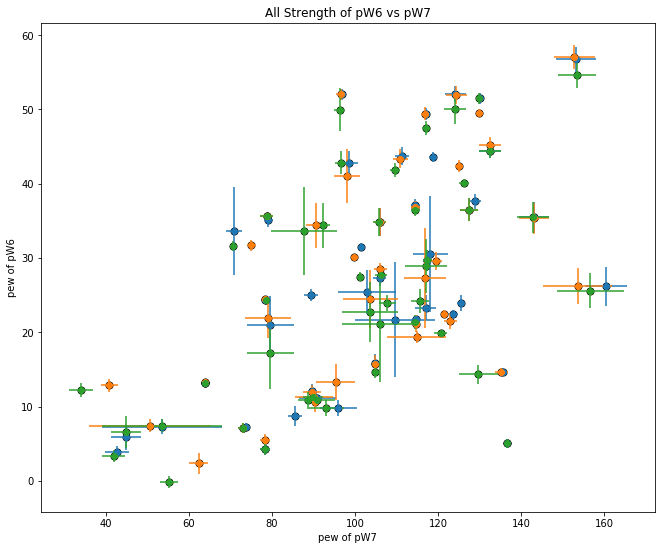

In [51]:
plt.scatter(emjoined_data['pewseven'] , emjoined_data['pewsix'] , s=50 , color = 'black')
plt.errorbar(emjoined_data['pewseven'] , emjoined_data['pewsix'] , xerr = emjoined_data['pew_samperrseven'] , yerr = emjoined_data['pew_samperrsix'] , fmt='o')
plt.scatter(eljoined_data['pewseven'] , eljoined_data['pewsix'] , s=50 , color = 'black')
plt.errorbar(eljoined_data['pewseven'] , eljoined_data['pewsix'] , xerr = eljoined_data['pew_samperrseven'] , yerr = eljoined_data['pew_samperrsix'] , fmt='o')
plt.scatter(anjoined_data['pewseven'] , anjoined_data['pewsix'] , s=50 , color = 'black')
plt.title('All Strength of pW6 vs pW7')
plt.xlabel('pew of pW7')
plt.ylabel('pew of pW6')
plt.errorbar(anjoined_data['pewseven'] , anjoined_data['pewsix'] , xerr = anjoined_data['pew_samperrseven'] , yerr = anjoined_data['pew_samperrsix'] , fmt='o')
figure = plt.gcf()
figure.set_size_inches(11 , 9)

plt.savefig('feature_comparison_all.png')
#plotting the strength/pew of pw6 against pw7 and their sample error bars. 

# classifying subtypes

Boundaries pulled from https://iopscience.iop.org/article/10.1088/0004-637X/773/1/53/pdf

CL SNe: pW6 (Si ii 5972) > 30 Å,

BL SNe: pW7 (Si ii 6355) > 105 Å and pW6 (Si ii 5972) < 30 Å,

SS SNe: pW7 (Si ii 6355) < 70 Å,

CN SNe: 70 <= pW7 (Si ii 6355) <= 105 Å 
           and pW6 (Si ii 5972) <= 30 Å.

In [9]:
em_cl_six_data = emsix_data2[emsix_data2['pew'] > 30.0 ]
em_cl_data = em_cl_six_data.join(emseven_data2 , lsuffix = 'six' , rsuffix = 'seven')
em_cl_data.dropna(subset = ['pewsix' , 'pewseven'] , inplace = True)

el_cl_six_data = elsix_data2[elsix_data2['pew'] > 30.0 ]
el_cl_data = el_cl_six_data.join(elseven_data2 , lsuffix = 'six' , rsuffix = 'seven')
el_cl_data.dropna(subset = ['pewsix' , 'pewseven'] , inplace = True)

an_cl_six_data = ansix_data2[ansix_data2['pew'] > 30.0 ]
an_cl_data = an_cl_six_data.join(anseven_data2 , lsuffix = 'six' , rsuffix = 'seven')
an_cl_data.dropna(subset = ['pewsix' , 'pewseven'] , inplace = True)

#Making a dataframe of cool subtypes based on feature boundaries above. 
#Taking only indexed pw6 data and manipulating it, then joining the pw6 data that fit the 
#parameters with the pw7 data to generate a dataframe with only object ids with features that follow the 
#parameters for the cool subtype above
em_cl_data.head()

,,feat_namesix,feat_startsix,feat_endsix,velsix,vel_errsix,vel_samperrsix,pewsix,pew_errsix,pew_samperrsix,areasix,...,velseven,vel_errseven,vel_samperrseven,pewseven,pew_errseven,pew_samperrseven,areaseven,area_errseven,area_samperrseven,notesseven
obj_id,time,,,,,,,,,,,,,,,,,,,,,
2004eo,2453267.52,pW6,5595.2773,5926.0569,9588.114897,0.0,55.984429,34.831421,0.0,1.919305,1.100466e-14,...,11635.087862,0.0,19.207558,105.973148,0.0,1.431908,3.167018e-14,0.0,5.481292e-16,NaN
2004gs,2453352.76,pW6,5582.5477,5923.2323,10590.729334,0.0,13.771058,44.383100,0.0,0.980112,1.233936e-14,...,11184.504831,0.0,28.143348,132.498726,0.0,2.565899,3.506492e-14,0.0,9.264700e-16,NaN
2005ag,2453413.89,pW6,5585.7084,5909.7348,8086.604646,0.0,626.172383,30.533058,0.0,7.842017,2.078527e-15,...,11158.266735,0.0,46.878333,118.126468,0.0,4.160582,6.554172e-15,0.0,3.638858e-16,NaN
2005am,2453444.59,pW6,5577.7471,5870.4519,11398.960237,0.0,45.584414,37.616934,0.0,0.988534,2.270503e-13,...,10612.896651,0.0,10.510435,128.939653,0.0,1.285646,6.808586e-13,0.0,8.990742e-15,NaN
2005bl,2453475.63,pW6,5566.9407,5950.0646,10403.738758,0.0,100.893802,33.603062,0.0,5.948615,2.958409e-15,...,10207.566453,0.0,40.685267,70.896557,0.0,2.008421,5.574511e-15,0.0,1.957036e-16,NaN


In [10]:
em_bl_six_data = emsix_data2[emsix_data2['pew'] < 30.0]
em_bl_seven_data = emseven_data2[emseven_data2['pew'] > 105.0]
em_bl_data = em_bl_six_data.join(em_bl_seven_data , lsuffix = 'six' , rsuffix = 'seven')
em_bl_data.dropna(subset = ['pewsix' , 'pewseven'] , inplace = True)

el_bl_six_data = elsix_data2[elsix_data2['pew'] < 30.0]
el_bl_seven_data = elseven_data2[elseven_data2['pew'] > 105.0]
el_bl_data = el_bl_six_data.join(el_bl_seven_data , lsuffix = 'six' , rsuffix = 'seven')
el_bl_data.dropna(subset = ['pewsix' , 'pewseven'] , inplace = True)

an_bl_six_data = ansix_data2[ansix_data2['pew'] < 30.0]
an_bl_seven_data = anseven_data2[anseven_data2['pew'] > 105.0]
an_bl_data = an_bl_six_data.join(an_bl_seven_data , lsuffix = 'six' , rsuffix = 'seven')
an_bl_data.dropna(subset = ['pewsix' , 'pewseven'] , inplace = True)

#Making a dataframe of broad line subtypes based on feature boundaries above. 
em_bl_data.head()

,,feat_namesix,feat_startsix,feat_endsix,velsix,vel_errsix,vel_samperrsix,pewsix,pew_errsix,pew_samperrsix,areasix,...,velseven,vel_errseven,vel_samperrseven,pewseven,pew_errseven,pew_samperrseven,areaseven,area_errseven,area_samperrseven,notesseven
obj_id,time,,,,,,,,,,,,,,,,,,,,,
2004ef,2453255.66,pW6,5601.6630,5845.0790,11653.806410,0.0,116.308974,26.145953,0.0,2.585566,7.766692e-15,...,15193.426217,0.0,27.138789,160.323798,0.0,5.064953,4.837755e-14,0.0,2.321021e-15,NaN
2005hc,2453661.71,pW6,5637.2311,5932.5044,9016.189306,0.0,1138.204416,21.646075,0.0,7.740077,2.405304e-15,...,11167.457019,0.0,224.836576,109.700189,0.0,9.604836,1.140627e-14,0.0,1.370495e-15,NaN
2006kf,2454035.81,pW6,5632.6028,5873.8188,10807.115215,0.0,29.594325,27.256616,0.0,1.093166,1.377773e-14,...,11534.730966,0.0,12.759265,105.956849,0.0,1.628559,5.005963e-14,0.0,9.560200e-16,end of feature in middle of plateau. very clea...
2007N,2454129.83,pW6,5650.1258,5923.8892,7332.469844,0.0,37.514076,23.926271,0.0,1.110746,1.214249e-14,...,8117.463769,0.0,14.731463,125.467952,0.0,0.961673,6.040729e-14,0.0,5.983231e-16,NaN
2007bd,2454199.64,pW6,5622.4948,5847.4497,12242.372705,0.0,29.101432,22.379348,0.0,0.601486,9.927614e-15,...,13098.032931,0.0,17.852127,123.536287,0.0,1.341063,5.083944e-14,0.0,7.406204e-16,NaN


In [11]:
em_ss_seven_data = emseven_data2[emseven_data2['pew'] < 70.0]
em_ss_data = emsix_data2.join(em_ss_seven_data , lsuffix = 'six' , rsuffix = 'seven')
em_ss_data.dropna(subset = ['pewsix' , 'pewseven'] , inplace = True)

el_ss_seven_data = elseven_data2[elseven_data2['pew'] < 70.0]
el_ss_data = elsix_data2.join(el_ss_seven_data , lsuffix = 'six' , rsuffix = 'seven')
el_ss_data.dropna(subset = ['pewsix' , 'pewseven'] , inplace = True)

an_ss_seven_data = anseven_data2[anseven_data2['pew'] < 70.0]
an_ss_data = ansix_data2.join(an_ss_seven_data , lsuffix = 'six' , rsuffix = 'seven')
an_ss_data.dropna(subset = ['pewsix' , 'pewseven'] , inplace = True)

#Making a dataframe of shallow silicon subtypes based on feature boundaries above. 
em_ss_data

,,feat_namesix,feat_startsix,feat_endsix,velsix,vel_errsix,vel_samperrsix,pewsix,pew_errsix,pew_samperrsix,areasix,...,velseven,vel_errseven,vel_samperrseven,pewseven,pew_errseven,pew_samperrseven,areaseven,area_errseven,area_samperrseven,notesseven
obj_id,time,,,,,,,,,,,,,,,,,,,,,
2005M,2453405.71,pW6,5700.1088,5902.4703,7606.921697,0.0,620.536232,5.840748,0.0,1.640812,5.560172e-15,...,8325.903081,0.0,39.383454,44.905281,0.0,3.674506,3.624259e-14,0.0,3.479361e-15,NaN
2005eq,2453648.81,pW6,5694.0399,5868.4298,8814.878722,0.0,548.972228,3.877981,0.0,0.872562,1.108113e-15,...,10190.749986,0.0,72.253212,42.786331,0.0,2.972308,1.069620e-14,0.0,8.309333e-16,NaN
2006hx,2454013.65,pW6,5566.5676,5817.4976,14403.554168,0.0,612.788060,7.303240,0.0,1.031331,2.219162e-15,...,10741.290414,0.0,457.675782,53.542004,0.0,14.492406,1.614750e-14,0.0,4.669895e-15,gaussian really fans out at ends. Set at peak ...
2008fp,2454726.83,pW6,5653.0498,5936.7334,7839.119220,0.0,273.871328,13.106725,0.0,0.516979,6.861054e-14,...,10586.941623,0.0,13.122219,63.923842,0.0,0.715212,3.021408e-13,0.0,4.137189e-15,NaN


In [12]:
em_cn_seven_data = emseven_data2[(emseven_data2['pew'] <= 105.0) & (emseven_data2['pew'] >= 70.0)]
em_cn_six_data = emsix_data2[emsix_data2['pew'] <= 30.0]
em_cn_data = em_cn_six_data.join(em_cn_seven_data , lsuffix = 'six' , rsuffix = 'seven')
em_cn_data.dropna(subset = ['pewsix' , 'pewseven'] , inplace = True)

el_cn_seven_data = elseven_data2[(elseven_data2['pew'] <= 105.0) & (elseven_data2['pew'] >= 70.0)]
el_cn_six_data = elsix_data2[elsix_data2['pew'] <= 30.0]
el_cn_data = el_cn_six_data.join(el_cn_seven_data , lsuffix = 'six' , rsuffix = 'seven')
el_cn_data.dropna(subset = ['pewsix' , 'pewseven'] , inplace = True)

an_cn_seven_data = anseven_data2[(anseven_data2['pew'] <= 105.0) & (anseven_data2['pew'] >= 70.0)]
an_cn_six_data = ansix_data2[ansix_data2['pew'] <= 30.0]
an_cn_data = an_cn_six_data.join(an_cn_seven_data , lsuffix = 'six' , rsuffix = 'seven')
an_cn_data.dropna(subset = ['pewsix' , 'pewseven'] , inplace = True)

em_cn_data.head()
#Making a dataframe of core normal subtypes based on feature boundaries above. 

,,feat_namesix,feat_startsix,feat_endsix,velsix,vel_errsix,vel_samperrsix,pewsix,pew_errsix,pew_samperrsix,areasix,...,velseven,vel_errseven,vel_samperrseven,pewseven,pew_errseven,pew_samperrseven,areaseven,area_errseven,area_samperrseven,notesseven
obj_id,time,,,,,,,,,,,,,,,,,,,,,
2004ey,2453303.56,pW6,5655.6296,5878.3355,9616.689113,0.0,68.443993,9.803429,0.0,1.028993,3.389668e-14,...,10508.780942,0.0,57.857318,95.986843,0.0,4.458953,2.840620e-13,0.0,1.860332e-14,NaN
2005el,2453639.82,pW6,5641.1019,5880.8401,10557.751992,0.0,48.290967,11.150505,0.0,0.493846,2.109696e-14,...,10883.782196,0.0,23.542053,90.957525,0.0,4.519559,1.541376e-13,0.0,8.520257e-15,NaN
2005kc,2453698.58,pW6,5670.9295,5957.0734,8104.784963,0.0,144.123561,25.010624,0.0,0.798953,6.369286e-14,...,9735.007020,0.0,18.505196,89.427647,0.0,1.600913,2.282369e-13,0.0,5.608038e-15,NaN
2005ki,2453697.85,pW6,5640.3450,5879.3778,10869.704054,0.0,265.259094,25.394002,0.0,2.921909,5.654773e-15,...,11696.624529,0.0,64.444498,102.926306,0.0,7.042350,2.098497e-14,0.0,1.687971e-15,NaN
2006ax,2453816.76,pW6,5666.8562,5828.3886,10800.640597,0.0,136.500229,8.723506,0.0,1.388020,8.899346e-15,...,11743.623377,0.0,29.436697,85.568609,0.0,1.758708,8.068201e-14,0.0,2.090916e-15,plateau encased by right boundary. Placed the ...


# plotting classifications

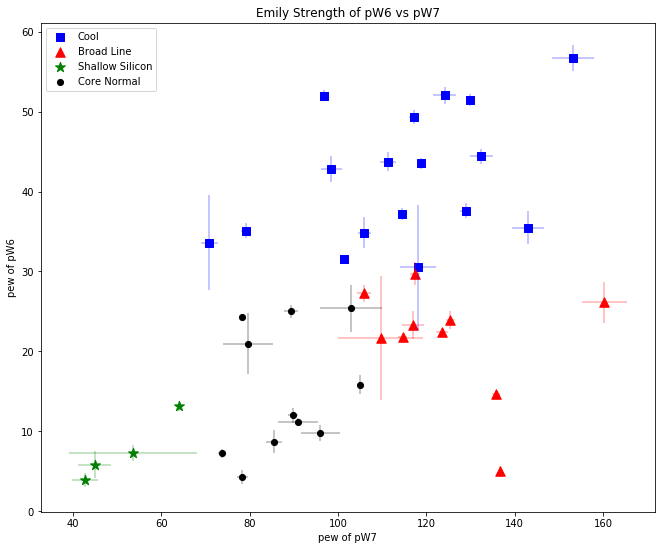

In [52]:
#Cool 
plt.scatter(em_cl_data['pewseven'] , em_cl_data['pewsix'] , label = 'Cool' , s = 50 , color = 'blue' , marker = 's')
plt.errorbar(em_cl_data['pewseven'] , em_cl_data['pewsix'] , xerr = em_cl_data['pew_samperrseven'] , yerr = em_cl_data['pew_samperrsix'] , fmt = 'none' , color = 'blue' , alpha = 0.3)
#Broad Line
plt.scatter(em_bl_data['pewseven'] , em_bl_data['pewsix'] , label = 'Broad Line' , s = 90 , color = 'red' , marker = '^')
plt.errorbar(em_bl_data['pewseven'] , em_bl_data['pewsix'] , xerr = em_bl_data['pew_samperrseven'] , yerr = em_bl_data['pew_samperrsix'] , fmt = 'none' , color = 'red' , alpha = 0.3)
#Shallow Silicon
plt.scatter(em_ss_data['pewseven'] , em_ss_data['pewsix'] , label = 'Shallow Silicon' , s = 110 , color = 'green' , marker = '*')
plt.errorbar(em_ss_data['pewseven'] , em_ss_data['pewsix'] , xerr = em_ss_data['pew_samperrseven'] , yerr = em_ss_data['pew_samperrsix'] , fmt = 'none' , color = 'green' , alpha = 0.3)
#Core Normal
plt.scatter(em_cn_data['pewseven'] , em_cn_data['pewsix'] , label = 'Core Normal' , s = 150 , color = 'black' , marker = '.')
plt.errorbar(em_cn_data['pewseven'] , em_cn_data['pewsix'] , xerr = em_cn_data['pew_samperrseven'] , yerr = em_cn_data['pew_samperrsix'] , fmt = 'none' , color = 'black' , alpha = 0.3)

plt.title('Emily Strength of pW6 vs pW7')
plt.legend(loc = ('upper left'))
plt.xlabel('pew of pW7')
plt.ylabel('pew of pW6')
figure = plt.gcf()
figure.set_size_inches(11, 9)

plt.savefig('feature_comparison_emily.png')

In [14]:
emjoined_data2 = emjoined_data[['pewsix' , 'pewseven']]
emjoined_data2

,,pewsix,pewseven
obj_id,time,,
2004ef,2453255.66,26.145953,160.323798
2004eo,2453267.52,34.831421,105.973148
2004ey,2453303.56,9.803429,95.986843
2004gs,2453352.76,44.383100,132.498726
2005M,2453405.71,5.840748,44.905281
2005ag,2453413.89,30.533058,118.126468
2005am,2453444.59,37.616934,128.939653
2005bl,2453475.63,33.603062,70.896557
2005el,2453639.82,11.150505,90.957525


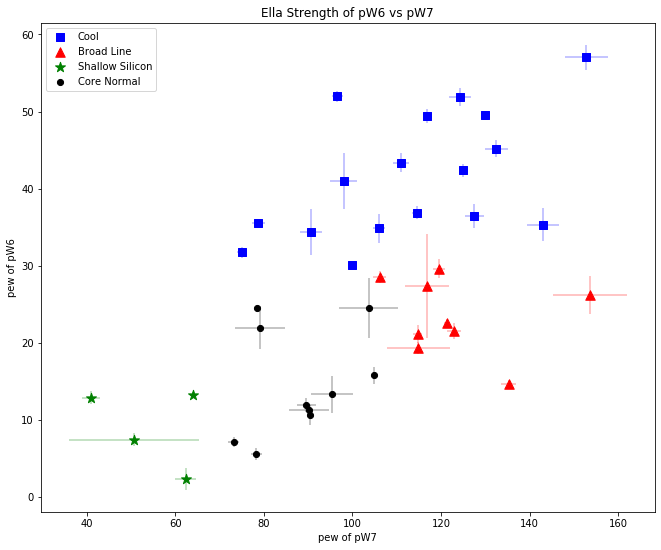

In [53]:
#Cool 
plt.scatter(el_cl_data['pewseven'] , el_cl_data['pewsix'] , label = 'Cool' , s = 50 , color = 'blue' , marker = 's')
plt.errorbar(el_cl_data['pewseven'] , el_cl_data['pewsix'] , xerr = el_cl_data['pew_samperrseven'] , yerr = el_cl_data['pew_samperrsix'] , fmt = 'none' , color = 'blue' , alpha = 0.3)
#Broad Line
plt.scatter(el_bl_data['pewseven'] , el_bl_data['pewsix'] , label = 'Broad Line' , s = 90 , color = 'red' , marker = '^')
plt.errorbar(el_bl_data['pewseven'] , el_bl_data['pewsix'] , xerr = el_bl_data['pew_samperrseven'] , yerr = el_bl_data['pew_samperrsix'] , fmt = 'none' , color = 'red' , alpha = 0.3)
#Shallow Silicon
plt.scatter(el_ss_data['pewseven'] , el_ss_data['pewsix'] , label = 'Shallow Silicon' , s = 110 , color = 'green' , marker = '*')
plt.errorbar(el_ss_data['pewseven'] , el_ss_data['pewsix'] , xerr = el_ss_data['pew_samperrseven'] , yerr = el_ss_data['pew_samperrsix'] , fmt = 'none' , color = 'green' , alpha = 0.3)
#Core Normal
plt.scatter(el_cn_data['pewseven'] , el_cn_data['pewsix'] , label = 'Core Normal' , s = 150 , color = 'black' , marker = '.')
plt.errorbar(el_cn_data['pewseven'] , el_cn_data['pewsix'] , xerr = el_cn_data['pew_samperrseven'] , yerr = el_cn_data['pew_samperrsix'] , fmt = 'none' , color = 'black' , alpha = 0.3)

plt.title('Ella Strength of pW6 vs pW7')
plt.legend(loc = ('upper left'))
plt.xlabel('pew of pW7')
plt.ylabel('pew of pW6')
figure = plt.gcf()
figure.set_size_inches(11 , 9)

plt.savefig('feature_comparison_ella.png')

In [16]:
eljoined_data2 = eljoined_data[['pewsix' , 'pewseven']]
eljoined_data2

,,pewsix,pewseven
obj_id,time,,
2004ef,2453255.66,26.203557,153.580329
2004eo,2453267.52,34.831421,105.973148
2004ey,2453303.56,13.282813,95.329282
2004gs,2453352.76,45.194122,132.498726
2004gu,2453358.83,2.354007,62.365015
2005ag,2453413.89,27.334818,116.829817
2005am,2453444.59,36.475071,127.509720
2005bl,2453475.63,33.603062,NaN
2005el,2453639.82,11.249567,90.199091


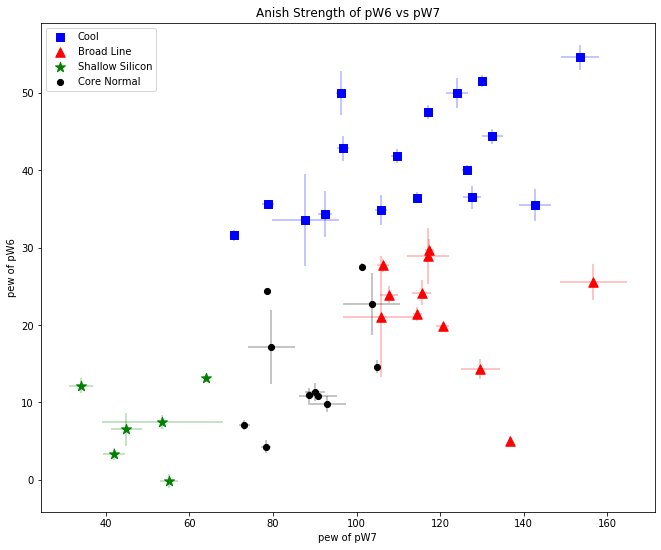

In [54]:
#Cool 
plt.scatter(an_cl_data['pewseven'] , an_cl_data['pewsix'] , label = 'Cool' , s = 50 , color = 'blue' , marker = 's')
plt.errorbar(an_cl_data['pewseven'] , an_cl_data['pewsix'] , xerr = an_cl_data['pew_samperrseven'], yerr = an_cl_data['pew_samperrsix'] , fmt = 'none' , color = 'blue' , alpha = 0.3)
#Broad Line
plt.scatter(an_bl_data['pewseven'] , an_bl_data['pewsix'] , label = 'Broad Line' , s = 90 , color = 'red' , marker = '^')
plt.errorbar(an_bl_data['pewseven'] , an_bl_data['pewsix'] , xerr = an_bl_data['pew_samperrseven'] , yerr = an_bl_data['pew_samperrsix'] , fmt = 'none' , color = 'red' , alpha = 0.3)
#Shallow Silicon
plt.scatter(an_ss_data['pewseven'] , an_ss_data['pewsix'] , label = 'Shallow Silicon' , s = 110 , color = 'green' , marker = '*')
plt.errorbar(an_ss_data['pewseven'] , an_ss_data['pewsix'] , xerr = an_ss_data['pew_samperrseven'] , yerr = an_ss_data['pew_samperrsix'] , fmt = 'none' , color = 'green' , alpha = 0.3)
#Core Normal
plt.scatter(an_cn_data['pewseven'] , an_cn_data['pewsix'] , label = 'Core Normal' , s = 150 , color = 'black' , marker = '.')
plt.errorbar(an_cn_data['pewseven'] , an_cn_data['pewsix'] , xerr = an_cn_data['pew_samperrseven'] , yerr = an_cn_data['pew_samperrsix'] , fmt = 'none' , color = 'black' , alpha = 0.3)

plt.title('Anish Strength of pW6 vs pW7')
plt.legend(loc = ('upper left'))
plt.xlabel('pew of pW7')
plt.ylabel('pew of pW6')
figure = plt.gcf()
figure.set_size_inches(11 , 9)

plt.savefig('feature_comparison_anish.png')

In [18]:
anjoined_data2 = anjoined_data[['pewsix' , 'pewseven']]
anjoined_data2

,,pewsix,pewseven
obj_id,time,,
2004ef,2453255.66,25.582235,156.664130
2004eo,2453267.52,34.831421,105.840416
2004ey,2453303.56,9.803429,92.981661
2004gs,2453352.76,44.383100,132.498726
2004gu,2453358.83,-0.141996,55.205920
2005M,2453405.71,6.539371,44.905281
2005ag,2453413.89,28.915178,117.104668
2005am,2453444.59,36.475071,127.509720
2005bl,2453475.63,33.603062,87.726698


# comparing csp classifications to our classifications

In [19]:
csp_table = dr1.load_table(1)
csp_df = csp_table.to_pandas()
csp_df = csp_df.rename(columns = {'SN' : 'obj_id'})
csp_df = csp_df.set_index(['obj_id'])
csp_df.head()
#loading in and indexing/renaming the csp data 

,N,Ep1,Ep2,Type,Wst,Bst,z,f_z,zCMB,T0,Bmag,e_Bmag,Dm15,e_Dm15,E(B-V),B-V,e_B-V,n_B-V,DBMag,e_DBMag
obj_id,,,,,,,,,,,,,,,,,,,,
2004dt,5,23.2,102.6,Normal,HV,BL,0.01973,NaN,0.01883,53239.1,15.000,0.035,1.235,0.072,0.023,-0.046,0.047,NaN,-0.39,0.18
2004ef,8,-8.0,37.5,Normal,HV,BL,0.03099,NaN,0.02979,53264.0,16.828,0.019,1.379,0.061,0.056,0.102,0.027,NaN,-0.09,0.12
2004eo,3,-10.5,24.9,Normal,N,CL,0.01570,NaN,0.01475,53278.2,15.067,0.011,1.365,0.063,0.108,0.055,0.020,Y,-0.16,0.17
2004ey,4,-0.3,47.9,Normal,N,CN,0.01579,NaN,0.01464,53303.9,14.713,0.011,0.930,0.013,0.139,-0.063,0.022,Y,0.15,0.16
2004gc,4,10.8,33.1,Normal,NaN,NaN,0.03070,NaN,0.03074,53324.6,16.649,0.028,1.088,0.055,0.206,0.150,0.037,NaN,-0.25,0.13


In [20]:
csp_obj_df = csp_df['Bst']
csp_obj_df
#creating a dataframe of just the object id and subtype from csp data

obj_id
2004dt     BL
2004ef     BL
2004eo     CL
2004ey     CN
2004gc    NaN
         ... 
2009aa     CN
2009ab     CN
2009ad     SS
2009ag     BL
2005hj     SS
Name: Bst, Length: 93, dtype: object

In [21]:
em_bl_data_unindexed = em_bl_data.reset_index()
em_bl_obj_list = em_bl_data_unindexed['obj_id'].values.tolist()
em_bl_obj_list = [[obj_id , 'BL'] for obj_id in em_bl_obj_list]
em_bl_obj_df = pd.DataFrame(em_bl_obj_list , columns = ['obj_id' , 'Bst']) 

em_cl_data_unindexed = em_cl_data.reset_index()
em_cl_obj_list = em_cl_data_unindexed['obj_id'].values.tolist()
em_cl_obj_list = [[obj_id , 'CL'] for obj_id in em_cl_obj_list]
em_cl_obj_df = pd.DataFrame(em_cl_obj_list , columns = ['obj_id' , 'Bst']) 

em_ss_data_unindexed = em_ss_data.reset_index()
em_ss_obj_list = em_ss_data_unindexed['obj_id'].values.tolist()
em_ss_obj_list = [[obj_id , 'SS'] for obj_id in em_ss_obj_list]
em_ss_obj_df = pd.DataFrame(em_ss_obj_list , columns = ['obj_id' , 'Bst']) 

em_cn_data_unindexed = em_cn_data.reset_index()
em_cn_obj_list = em_cn_data_unindexed['obj_id'].values.tolist()
em_cn_obj_list = [[obj_id , 'CN'] for obj_id in em_cn_obj_list]
em_cn_obj_df = pd.DataFrame(em_cn_obj_list , columns = ['obj_id' , 'Bst']) 

#resetting the index for the dataframes that include only object ids for each subtype. 
#making the dataframes into lists of object ids
#making the lists multidimensional by adding the classification as the second dimension
#making the lists into new dataframes with two columns, object id and classification

In [22]:
el_bl_data_unindexed = el_bl_data.reset_index()
el_bl_obj_list = el_bl_data_unindexed['obj_id'].values.tolist()
el_bl_obj_list = [[obj_id , 'BL'] for obj_id in el_bl_obj_list]
el_bl_obj_df = pd.DataFrame(el_bl_obj_list , columns = ['obj_id' , 'Bst']) 

el_cl_data_unindexed = el_cl_data.reset_index()
el_cl_obj_list = el_cl_data_unindexed['obj_id'].values.tolist()
el_cl_obj_list = [[obj_id , 'CL'] for obj_id in el_cl_obj_list]
el_cl_obj_df = pd.DataFrame(el_cl_obj_list , columns = ['obj_id' , 'Bst']) 

el_ss_data_unindexed = el_ss_data.reset_index()
el_ss_obj_list = el_ss_data_unindexed['obj_id'].values.tolist()
el_ss_obj_list = [[obj_id , 'SS'] for obj_id in el_ss_obj_list]
el_ss_obj_df = pd.DataFrame(el_ss_obj_list , columns = ['obj_id' , 'Bst']) 

el_cn_data_unindexed = el_cn_data.reset_index()
el_cn_obj_list = el_cn_data_unindexed['obj_id'].values.tolist()
el_cn_obj_list = [[obj_id , 'CN'] for obj_id in el_cn_obj_list]
el_cn_obj_df = pd.DataFrame(el_cn_obj_list , columns = ['obj_id' , 'Bst']) 

In [23]:
an_bl_data_unindexed = an_bl_data.reset_index()
an_bl_obj_list = an_bl_data_unindexed['obj_id'].values.tolist()
an_bl_obj_list = [[obj_id , 'BL'] for obj_id in an_bl_obj_list]
an_bl_obj_df = pd.DataFrame(an_bl_obj_list , columns = ['obj_id' , 'Bst']) 

an_cl_data_unindexed = an_cl_data.reset_index()
an_cl_obj_list = an_cl_data_unindexed['obj_id'].values.tolist()
an_cl_obj_list = [[obj_id , 'CL'] for obj_id in an_cl_obj_list]
an_cl_obj_df = pd.DataFrame(an_cl_obj_list , columns = ['obj_id' , 'Bst']) 

an_ss_data_unindexed = an_ss_data.reset_index()
an_ss_obj_list = an_ss_data_unindexed['obj_id'].values.tolist()
an_ss_obj_list = [[obj_id , 'SS'] for obj_id in an_ss_obj_list]
an_ss_obj_df = pd.DataFrame(an_ss_obj_list , columns = ['obj_id' , 'Bst']) 

an_cn_data_unindexed = an_cn_data.reset_index()
an_cn_obj_list = an_cn_data_unindexed['obj_id'].values.tolist()
an_cn_obj_list = [[obj_id , 'CN'] for obj_id in an_cn_obj_list]
an_cn_obj_df = pd.DataFrame(an_cn_obj_list , columns = ['obj_id' , 'Bst']) 

In [24]:
em_obj_df = em_bl_obj_df.append(em_cl_obj_df)
em_obj_df = em_obj_df.append(em_ss_obj_df)
em_obj_df = em_obj_df.append(em_cn_obj_df)
em_obj_df = em_obj_df.set_index(['obj_id'])
em_obj_df.head()
#appending all 4 of the dataframes with the subtypes into one

,Bst
obj_id,
2004ef,BL
2005hc,BL
2006kf,BL
2007N,BL
2007bd,BL


In [25]:
el_obj_df = el_bl_obj_df.append(el_cl_obj_df)
el_obj_df = el_obj_df.append(el_ss_obj_df)
el_obj_df = el_obj_df.append(el_cn_obj_df)
el_obj_df = el_obj_df.set_index(['obj_id'])
el_obj_df.head()

,Bst
obj_id,
2004ef,BL
2005ag,BL
2006kf,BL
2007N,BL
2007bd,BL


In [26]:
an_obj_df = an_bl_obj_df.append(an_cl_obj_df)
an_obj_df = an_obj_df.append(an_ss_obj_df)
an_obj_df = an_obj_df.append(an_cn_obj_df)
an_obj_df = an_obj_df.set_index(['obj_id'])
an_obj_df.head()

,Bst
obj_id,
2004ef,BL
2005ag,BL
2005hc,BL
2006kf,BL
2007N,BL


In [41]:
comparison = em_obj_df.join(csp_obj_df , lsuffix = 'EMILY' , rsuffix = 'CSP')
comparison = el_obj_df.join(comparison , lsuffix = 'ELLA' , rsuffix = '')
comparison = an_obj_df.join(comparison , lsuffix = 'ANISH' , rsuffix = '')
comparison.columns = ['anish_type' , 'ella_type' , 'emily_type' , 'csp_type']
comparison
#joining the dataframe of our classifications with that of CSP's 

,anish_type,ella_type,emily_type,csp_type
obj_id,,,,
2004ef,BL,BL,BL,BL
2005ag,BL,BL,CL,BL
2005hc,BL,NaN,NaN,NaN
2006kf,BL,BL,BL,CL
2007N,BL,BL,BL,CL
2007bd,BL,BL,BL,BL
2007jg,BL,BL,BL,BL
2007le,BL,BL,BL,BL
2007nq,BL,BL,BL,BL


In [50]:
comparison.to_csv('branch_subtype_comparison.csv')

In [28]:
#not_equal = comparison[(comparison['emily_type'] != comparison['csp_type']) 
                       #or (comparison['ella_type'] != comparison['csp_type']) 
                       #or (comparison['anish_type'] != comparison['csp_type'])]
#not_equal
#WIP. Creating a dataframe of only the object ids where CSP classified differently than us 

# bokeh plots

http://docs.bokeh.org/en/0.11.1/docs/user_guide/tools.html

In [29]:
em_cl_data2 = em_cl_data.reset_index()
em_bl_data2 = em_bl_data.reset_index()
em_ss_data2 = em_ss_data.reset_index()
em_cn_data2 = em_cn_data.reset_index()

emily's pw6 vs pw7

In [37]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool

output_file('toolbar.html')

source_cl = ColumnDataSource(
        data = dict(
            x = em_cl_data2['pewseven'] ,
            y = em_cl_data2['pewsix'] ,
            desc = em_cl_data2['obj_id'] ,
        )
    )
source_bl = ColumnDataSource(
        data = dict(
            x = em_bl_data2['pewseven'] ,
            y = em_bl_data2['pewsix'] ,
            desc = em_bl_data2['obj_id'] ,
        )
    )
source_ss = ColumnDataSource(
        data = dict(
            x = em_ss_data2['pewseven'] ,
            y = em_ss_data2['pewsix'] ,
            desc = em_ss_data2['obj_id'] ,
        )
    )
source_cn = ColumnDataSource(
        data = dict(
            x = em_cn_data2['pewseven'] ,
            y = em_cn_data2['pewsix'] ,
            desc = em_cn_data2['obj_id'] ,
        )
    )


hover = HoverTool(
        tooltips = [
            ('index' , '$index') ,
            ('(x,y)' , '($x, $y)') ,
            ('desc' , '@desc') ,
        ]
    )

p = figure(plot_width = 600 , plot_height = 600 , tools = [hover] ,
           title = 'emily strength of pw6 vs pw7')

p.yaxis.axis_label = 'pw6'
p.xaxis.axis_label = 'pw7'

p.square('x' , 'y' , size = 10 , source = source_cl , color = 'blue')
p.triangle('x' , 'y' , size = 10 , source = source_bl , color = 'red')
p.diamond('x' , 'y' , size = 10 , source = source_ss , color = 'green')
p.circle('x' , 'y' , size = 10 , source = source_cn , color = 'black')

show(p)

In [31]:
el_cl_data2 = el_cl_data.reset_index()
el_bl_data2 = el_bl_data.reset_index()
el_ss_data2 = el_ss_data.reset_index()
el_cn_data2 = el_cn_data.reset_index()

ella's pw6 vs pw7

In [38]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool

output_file('toolbar.html')

source_cl = ColumnDataSource(
        data = dict(
            x = el_cl_data2['pewseven'] ,
            y = el_cl_data2['pewsix'] ,
            desc = el_cl_data2['obj_id'] ,
        )
    )
source_bl = ColumnDataSource(
        data = dict(
            x = el_bl_data2['pewseven'] ,
            y = el_bl_data2['pewsix'] ,
            desc = el_bl_data2['obj_id'] ,
        )
    )
source_ss = ColumnDataSource(
        data = dict(
            x = el_ss_data2['pewseven'] ,
            y = el_ss_data2['pewsix'] ,
            desc = el_ss_data2['obj_id'] ,
        )
    )
source_cn = ColumnDataSource(
        data = dict(
            x = el_cn_data2['pewseven'] ,
            y = el_cn_data2['pewsix'] ,
            desc = el_cn_data2['obj_id'] ,
        )
    )


hover = HoverTool(
        tooltips = [
            ('index' , '$index') ,
            ('(x,y)' , '($x, $y)') ,
            ('desc' , '@desc') ,
        ]
    )

p = figure(plot_width = 600 , plot_height = 600 , tools = [hover] ,
           title = 'ella strength of pw6 vs pw7')

p.yaxis.axis_label = 'pw6'
p.xaxis.axis_label = 'pw7'

p.square('x' , 'y' , size = 10 , source = source_cl , color = 'blue')
p.triangle('x' , 'y' , size = 10 , source = source_bl , color = 'red')
p.diamond('x' , 'y' , size = 10 , source = source_ss , color = 'green')
p.circle('x' , 'y' , size = 10 , source = source_cn , color = 'black')

show(p)

In [33]:
an_cl_data2 = an_cl_data.reset_index()
an_bl_data2 = an_bl_data.reset_index()
an_ss_data2 = an_ss_data.reset_index()
an_cn_data2 = an_cn_data.reset_index()

anish's pw6 vs pw7

In [39]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool

output_file('toolbar.html')

source_cl = ColumnDataSource(
        data = dict(
            x = an_cl_data2['pewseven'] ,
            y = an_cl_data2['pewsix'] ,
            desc = an_cl_data2['obj_id'] ,
        )
    )
source_bl = ColumnDataSource(
        data = dict(
            x = an_bl_data2['pewseven'] ,
            y = an_bl_data2['pewsix'] ,
            desc = an_bl_data2['obj_id'] ,
        )
    )
source_ss = ColumnDataSource(
        data = dict(
            x = an_ss_data2['pewseven'] ,
            y = an_ss_data2['pewsix'] ,
            desc = an_ss_data2['obj_id'] ,
        )
    )
source_cn = ColumnDataSource(
        data = dict(
            x = an_cn_data2['pewseven'] ,
            y = an_cn_data2['pewsix'] ,
            desc = an_cn_data2['obj_id'] ,
        )
    )


hover = HoverTool(
        tooltips = [
            ('index' , '$index') ,
            ('(x,y)' , '($x, $y)') ,
            ('desc' , '@desc') ,
        ]
    )

p = figure(plot_width = 600 , plot_height = 600 , tools = [hover] ,
           title = 'anish strength of pw6 vs pw7')

p.yaxis.axis_label = 'pw6'
p.xaxis.axis_label = 'pw7'

p.square('x' , 'y' , size = 10 , source = source_cl , color = 'blue')
p.triangle('x' , 'y' , size = 10 , source = source_bl , color = 'red')
p.diamond('x' , 'y' , size = 10 , source = source_ss , color = 'green')
p.circle('x' , 'y' , size = 10 , source = source_cn , color = 'black')

show(p)

In [35]:
emjoined_data2 = emjoined_data.reset_index()
eljoined_data2 = eljoined_data.reset_index()
anjoined_data2 = anjoined_data.reset_index()

all of our points plotted together (emily=blue, ella=red, anish=black)

In [42]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool

output_file('toolbar.html')

source_em = ColumnDataSource(
        data = dict(
            x = emjoined_data2['pewseven'] ,
            y = emjoined_data2['pewsix'] ,
            desc = emjoined_data2['obj_id'] ,
        )
    )
source_el = ColumnDataSource(
        data = dict(
            x = eljoined_data2['pewseven'] ,
            y = eljoined_data2['pewsix'] ,
            desc = eljoined_data2['obj_id'] ,
        )
    )
source_an = ColumnDataSource(
        data = dict(
            x = anjoined_data2['pewseven'] ,
            y = anjoined_data2['pewsix'] ,
            desc = anjoined_data2['obj_id'] ,
        )
    )

hover = HoverTool(
        tooltips = [
            ('index' , '$index') ,
            ('(x,y)' , '($x, $y)') ,
            ('desc' , '@desc') ,
        ]
    )

p = figure(plot_width = 900 , plot_height = 800 , tools = [hover] ,
           title = 'combined strength of pw6 vs pw7')

p.yaxis.axis_label = 'pw6'
p.xaxis.axis_label = 'pw7'

p.circle('x' , 'y' , size = 5 , source = source_em , color = 'blue')
p.circle('x' , 'y' , size = 5 , source = source_el , color = 'red')
p.circle('x' , 'y' , size = 5 , source = source_an , color = 'black')

show(p)